###  Web Scraping and EDA analysis Project

### Objective/Research Question:

1. Relation between Area and Price
2. Average Budget as Per Flat Area
3. Average Budget a person could have to purchase a flat
4. Average Price of flats based on top 10 areas of city with maximum flats

**Here I want to understand the Most desirable areas, Bedroom size and Average Price of the city so that it would help a buyer to get an average estimate of budget to purchase a flat in Hyderabad**

In [1]:
#Imported Necessary Liabraries

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests                                                                                                                                                                                                       
import re
import regex
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Scrapping 

In [34]:

price_list = []
bedroom_list = []
society_list = []
area_list = []
address_list = []
detail_list = []


#To save all the data in th info variable , so that we do not need to run the code again
for i in range(30):
    
    s='https://www.magicbricks.com/property-for-sale/residential-real-estate?&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&verified=Y&cityName=Hyderabad&alliance=&banks=&searchType=1&page='+str(i)+'&tab1=&sortBy=premiumRecent&alliance=&banks='
    page = requests.get(s)
    soup = BeautifulSoup(page.text)
    info = soup.find_all('div',attrs={'class':'l-srp__results flex__item'})


    


### Code to scrap the data from the website

In [11]:
info = soup.find_all('div',attrs={'class':'l-srp__results flex__item'})


    
#Price of each property Listed
for j in info:
    price =j.find_all('div',attrs={'class':'m-srp-card__price'})
    for p in price:
        if p is None:
            price_list.append(np.NaN)
        else:
            price_list.append(p.text)

#Bedroom list
for k in info:
    bedroom = k.find_all('span',attrs={'class':'m-srp-card__title__bhk'})
    for b in bedroom:
        if b is None:
            bedroom_list.append(np.Nan) 
        else:
            bedroom_list.append(b.text)


#Society List          
for o in info:
    society = o.find_all('a',attrs={'class':'m-srp-card__link'})
    for s in society:
        if s is None:
            society_list.append(np.Nan) 
        else:
            society_list.append(s.text)


#Area in Square feet          
for m in info:
    area = m.find_all('div',attrs={'class':'m-srp-card__summary__info'})
    for a in area:
        if a is None:
            area_list.append(np.Nan)
        else:
            area_list.append(a.text)

#address and bedroom numbers            
for n in info:
    address = n.find_all('span',attrs={'class':'m-srp-card__title'})
    for r in address:
        if r is None:
            address_list.append(np.NaN)
        else:
            address_list.append(r.text)

#other informations
for q in info:
    detail = q.find_all('div',attrs={'class':'m-srp-card__summary js-collapse__content'})
    for d in detail:
        if d is None:
            detail_list.append(np.Nan)
        else:
            detail_list.append(d.text)

In [12]:
#the kength of each variable
print(len(price_list))
print(len(bedroom_list))
print(len(society_list))
print(len(area_list))
print(len(address_list))
print(len(detail_list))

926
930
463
8916
930
930


In [35]:
#Adjustment to make DataFrame from Different length column

a = {'Society':society_list[0:455],'Price':price_list[0:455],'Address':address_list[0:455],'Details':detail_list[0:455]}
m1 = pd.DataFrame.from_dict(a,orient='index')
df = m1.transpose()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Society  0 non-null      float64
 1   Price    0 non-null      float64
 2   Address  0 non-null      float64
 3   Details  0 non-null      float64
dtypes: float64(4)
memory usage: 124.0 bytes


In [27]:
df.head()

,Society,Price,Address,Details
0,Dukes Galaxy,₹ 2.48 Cr,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\ncarpet area\n2020 sqft\n\n\n\nstatus\nRe...
1,Sri Hemadurga Sivahills,₹ 1.14 Cr,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\nsuper area\n1900 sqft\n\n\n\nstatus\n\n\...
2,SMR Vinay Iconia,₹ 1.21 Cr,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\nsuper area\n1495 sqft\n\n\n\n\ntransacti...
3,Honer Vivantis,₹ 1.30 Cr,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\nsuper area\n1845 sqft\n\n\n\nstatus\nRea...
4,PBEL City,₹ 42 Lac,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\ncarpet area\n780 sqft\n\n\n\nstatus\nRea...


### Limited Data till 431 Rows as Society names are not available in rest of the data

In [51]:
#limiting the column length tikk society column legth

df2 = df.iloc[0:431]

In [52]:
#TO save the scrapped data in Magic_df CSV file

df2.to_csv('Magic_df.csv')

### EDA

### Importing Data

In [2]:
#Importing the final scrapped data saved as csv
magic= pd.read_csv('Magic_df.csv')


### To display the First five rows of the data

In [3]:
magic.head()

,Unnamed: 0,Society,Price,Address,Details
0,0,Dukes Galaxy,₹ 2.48 Cr,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\ncarpet area\n2020 sqft\n\n\n\nstatus\nRe...
1,1,Sri Hemadurga Sivahills,₹ 1.14 Cr,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\nsuper area\n1900 sqft\n\n\n\nstatus\n\n\...
2,2,SMR Vinay Iconia,₹ 1.21 Cr,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\nsuper area\n1495 sqft\n\n\n\n\ntransacti...
3,3,Honer Vivantis,₹ 1.30 Cr,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\nsuper area\n1845 sqft\n\n\n\nstatus\nRea...
4,4,PBEL City,₹ 42 Lac,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\ncarpet area\n780 sqft\n\n\n\nstatus\nRea...


### To display the Last five rows of the data

In [4]:
magic.tail()

,Unnamed: 0,Society,Price,Address,Details
426,426,SMR Vinay Iconia,₹ 44 Lac,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\ncarpet area\n900 sqft\n\n\n\nstatus\nRea...
427,427,Rajapushpa Regalia,₹ 90 Lac,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\ncarpet area\n1480 sqft\n\n\n\nstatus\nRe...
428,428,Dukes Galaxy,₹ 1.20 Cr,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\ncarpet area\n1240 sqft\n\n\n\nstatus\nRe...
429,429,SMR Vinay Iconia,₹ 45 Lac,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\ncarpet area\n980 sqft\n\n\n\nstatus\nRea...
430,430,Dukes Galaxy,₹ 55 Lac,\n\n\n\t\t\t\t \t\t\n\t\t\t\t ...,\n\n\ncarpet area\n900 sqft\n\n\n\nstatus\nRea...


### Droping the 'Unnamed: 0' column created automatically  

In [ ]:
magic.drop('Unnamed: 0',axis = 1, inplace = True)

### Checking the Types of the daya 

In [57]:
magic.dtypes

Society    object
Price      object
Address    object
Details    object
dtype: object

### To display the  Null counts and Data types information of the data for each column

In [58]:
magic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Society  431 non-null    object
 1   Price    431 non-null    object
 2   Address  431 non-null    object
 3   Details  431 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB


### The Address and Details Column has most of the Information. We need to get the required features by splitting the Address and Details columns

### Fetching Data From Details Column


In [59]:
#Pulling data in splitted form in a variable named 'K'

k = magic['Details'].str.split('\n',expand = True)

In [60]:
#TO enhance the size to make the  output readable 

pd.set_option('display.max_columns',None)
k

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,,,,carpet area,2020 sqft,,,,status,Ready to Move,,,,floor,2 out of 4 floors,,,transaction,New Property,,,furnishing,Unfurnished,,,facing,East,,,overlooking,Main Road,,,car parking,2 Covered,,,bathroom,3,,,balcony,2,,,ownership,Freehold,,,None,None
1,,,,super area,1900 sqft,,,,status,,\t\t\t\t\t\t\t\tPossession by Dec '21,\t\t\t\t\t\t\t,,,,transaction,New Property,,,furnishing,Unfurnished,,,bathroom,3,,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,,,,super area,1495 sqft,,,,,transaction,New Property,,,furnishing,Unfurnished,,,car parking,1 Covered,,,bathroom,2,,,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,,,,super area,1845 sqft,,,,status,Ready to Move,,,,floor,11 out of 12 floors,,,transaction,New Property,,,furnishing,Unfurnished,,,facing,West,,,overlooking,Garden/Park,,,car parking,2 Covered,,,bathroom,3,,,balcony,2,,,ownership,Freehold,,,None,None
4,,,,carpet area,780 sqft,,,,status,Ready to Move,,,,floor,3 out of 5 floors,,,transaction,Resale,,,furnishing,Semi-Furnished,,,facing,North,,,car parking,"1 Covered, 1 Open",,,bathroom,2,,,balcony,1,,,ownership,Freehold,,,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,,,,carpet area,900 sqft,,,,status,Ready to Move,,,,floor,5 out of 5 floors,,,transaction,Resale,,,furnishing,Semi-Furnished,,,facing,West,,,car parking,"1 Covered, 1 Open",,,bathroom,2,,,balcony,2,,,None,None,None,None,None,None,None,None,None,None
427,,,,carpet area,1480 sqft,,,,status,Ready to Move,,,,floor,1 out of 5 floors,,,transaction,Resale,,,furnishing,Semi-Furnished,,,facing,East,,,overlooking,Garden/Park,,,car parking,1 Covered,,,bathroom,3,,,balcony,3,,,ownership,Freehold,,,None,None
428,,,,carpet area,1240 sqft,,,,status,Ready to Move,,,,floor,9 out of 11 floors,,,transaction,Resale,,,furnishing,Semi-Furnished,,,facing,South,,,overlooking,"Pool, Garden/Park",,,bathroom,2,,,balcony,1,,,ownership,Freehold,,,None,None,None,None,None,None
429,,,,carpet area,980 sqft,,,,status,Ready to Move,,,,floor,1 out of 3 floors,,,transaction,Resale,,,furnishing,Unfurnished,,,facing,East,,,bathroom,2,,,balcony,1,,,ownership,Freehold,,,None,None,None,None,None,None,None,None,None,None


In [61]:
#Making Clean Columns from Details Column

k['Status'] = k[8]+k[9]+k[10]
k['Direction'] = k[25]+" "+k[26]
k['Direction'] = k.Direction.str.strip('facing')
k['View'] = k[30]
k['Area_Sqft'] = k[4] 
k['Area_type'] = k[3]
k['Floor'] = k[14]



In [62]:
#Cleaning Status column by splitting

v = k.Status.str.split(expand=True)

#TO remove the status word from clomun 0
v['Possesion'] = v[0].str.strip('status')

# replacing NA by Sace
v.fillna("", inplace=True)

#To create the possetion column
v['Possesion']=v['Possesion']+" "+v[1]+" "+v[2]+" "+v[3]+" "+v[4]

#To add the final posession column to the k data frame
k['Possesion'] = v['Possesion']


**Final Columns From K variable used to clean Details Columns**

k['Status']

k['Direction']

k['View']

k['Floor']

k['Area_Sqft']

k['Possesion']

k['Area_type']


### Fetching data from Address Column of Magic Data frame

In [63]:
#To save the splitted data in to c Dataframe variable
c =  magic.Address.str.split(expand = True)

In [64]:
c.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3,BHK,Flat,for,Sale,in,Banjara,"Hills,",NH,9,None,None,None,None
1,3,BHK,Flat,for,Sale,in,Puppalaguda,None,None,None,None,None,None,None
2,2,BHK,Flat,for,Sale,in,Kondapur,None,None,None,None,None,None,None
3,3,BHK,Flat,for,Sale,in,Gopanapalli,None,None,None,None,None,None,None
4,2,BHK,Flat,for,Sale,in,Medipally,None,None,None,None,None,None,None


### To get the Null value counts from Splitted Address Column

In [65]:
#To get the Null Value Counts
c.isnull().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6      11
7     167
8     233
9     310
10    381
11    411
12    427
13    430
dtype: int64

### To fill NA values by Space so that the data can be concatenated

In [66]:
#To replace NA with " " so we dont face 
c.fillna(' ',inplace=True)
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3,BHK,Flat,for,Sale,in,Banjara,"Hills,",NH,9,,,,
1,3,BHK,Flat,for,Sale,in,Puppalaguda,,,,,,,
2,2,BHK,Flat,for,Sale,in,Kondapur,,,,,,,
3,3,BHK,Flat,for,Sale,in,Gopanapalli,,,,,,,
4,2,BHK,Flat,for,Sale,in,Medipally,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2,BHK,Flat,for,Sale,in,"Uppal,",NH,2,2,,,,
427,3,BHK,Flat,for,Sale,in,DD,"Colony,",Amberpet,,,,,
428,2,BHK,Flat,for,Sale,in,Hitech,City,,,,,,
429,2,BHK,Flat,for,Sale,in,"Miyapur,",NH,9,,,,,


In [67]:
#creating New Clean Columns from Address

c['Main_Area'] = c[6]+" "+c[7]
c['Full_Address'] = c[6]+c[7]+c[8]+c[9]
c['BHK'] = c[0]


In [68]:
pd.set_option('display.width', None)
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Main_Area,Full_Address,BHK
0,3,BHK,Flat,for,Sale,in,Banjara,"Hills,",NH,9,,,,,"Banjara Hills,","BanjaraHills,NH9",3
1,3,BHK,Flat,for,Sale,in,Puppalaguda,,,,,,,,Puppalaguda,Puppalaguda,3
2,2,BHK,Flat,for,Sale,in,Kondapur,,,,,,,,Kondapur,Kondapur,2
3,3,BHK,Flat,for,Sale,in,Gopanapalli,,,,,,,,Gopanapalli,Gopanapalli,3
4,2,BHK,Flat,for,Sale,in,Medipally,,,,,,,,Medipally,Medipally,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2,BHK,Flat,for,Sale,in,"Uppal,",NH,2,2,,,,,"Uppal, NH","Uppal,NH22",2
427,3,BHK,Flat,for,Sale,in,DD,"Colony,",Amberpet,,,,,,"DD Colony,","DDColony,Amberpet",3
428,2,BHK,Flat,for,Sale,in,Hitech,City,,,,,,,Hitech City,HitechCity,2
429,2,BHK,Flat,for,Sale,in,"Miyapur,",NH,9,,,,,,"Miyapur, NH","Miyapur,NH9",2


**Final Columns from C Variable**

c['Main_Area']

c['Full_Address']

c['BHK'] = c[0]

### Final Columns Created from Both K(Details Columns) and C (Address Column)

**Final Columns From K variable used to clean Details Columns**

k['Status']

k['Area_type']

k['Direction']

k['View']

k['Floor']

k['Area_Sqft']

k['Possesion']

**Final Columns from C Variable**

c['Main_Area']

c['Full_Address']

c['BHK'] = c[0]

### Adding the columns in Magic data frame and naming columns

In [69]:
magic['Status'] = k['Status']
magic['BHK'] = c['BHK']
magic['Area_type']=k['Area_type']
magic['Area_sqft'] = k['Area_Sqft']
magic['Direction'] = k['Direction']
magic['Floor'] = k['Floor']
magic['View'] = k['View']  
magic['Possesion'] = k['Possesion']  
magic['Main_Area'] = c['Main_Area']
magic['Full_Address'] = c['Full_Address']

In [70]:
magic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Society       431 non-null    object
 1   Price         431 non-null    object
 2   Address       431 non-null    object
 3   Details       431 non-null    object
 4   Status        431 non-null    object
 5   BHK           431 non-null    object
 6   Area_type     431 non-null    object
 7   Area_sqft     431 non-null    object
 8   Direction     429 non-null    object
 9   Floor         431 non-null    object
 10  View          424 non-null    object
 11  Possesion     431 non-null    object
 12  Main_Area     431 non-null    object
 13  Full_Address  431 non-null    object
dtypes: object(14)
memory usage: 47.3+ KB


### Converting The Price column into integer by removing the string values 

In [71]:
#Converting Price column into FLoat

Lac= []

for i in magic['Price']:
    
    if 'Lac' in i:
        Lac.append((math.ceil(float(i.split(" ")[1]))/100))
    elif 'Cr' in i:
        Lac.append((float(i.split(" ")[1])))
        

magic['Price']=pd.DataFrame(Lac)


### Dropping Irrelavant Columns


In [ ]:
magic.drop(['Address','Details'], axis=1, inplace = True)
magic.drop(['Status'], axis=1, inplace = True)
magic.drop('Price_updated', axis = 1, inplace=True)

### magic data converted into a proper Data frame for analysis

In [73]:
magic

,Society,Price,BHK,Area_type,Area_sqft,Direction,Floor,View,Possesion,Main_Area,Full_Address
0,Dukes Galaxy,2.48,3,carpet area,2020 sqft,East,2 out of 4 floors,Main Road,Ready to Move,"Banjara Hills,","BanjaraHills,NH9"
1,Sri Hemadurga Sivahills,1.14,3,super area,1900 sqft,,,None,Possession by Dec '21,Puppalaguda,Puppalaguda
2,SMR Vinay Iconia,1.21,2,super area,1495 sqft,NaN,Unfurnished,None,ransactionNew Property,Kondapur,Kondapur
3,Honer Vivantis,1.30,3,super area,1845 sqft,West,11 out of 12 floors,Garden/Park,Ready to Move,Gopanapalli,Gopanapalli
4,PBEL City,0.42,2,carpet area,780 sqft,North,3 out of 5 floors,"1 Covered, 1 Open",Ready to Move,Medipally,Medipally
...,...,...,...,...,...,...,...,...,...,...,...
426,SMR Vinay Iconia,0.44,2,carpet area,900 sqft,West,5 out of 5 floors,"1 Covered, 1 Open",Ready to Move,"Uppal, NH","Uppal,NH22"
427,Rajapushpa Regalia,0.90,3,carpet area,1480 sqft,East,1 out of 5 floors,Garden/Park,Ready to Move,"DD Colony,","DDColony,Amberpet"
428,Dukes Galaxy,1.20,2,carpet area,1240 sqft,South,9 out of 11 floors,"Pool, Garden/Park",Ready to Move,Hitech City,HitechCity
429,SMR Vinay Iconia,0.45,2,carpet area,980 sqft,East,1 out of 3 floors,2,Ready to Move,"Miyapur, NH","Miyapur,NH9"


In [75]:
magic.dtypes

Society          object
Price           float64
BHK              object
Area_type        object
Area_sqft        object
Direction        object
Floor            object
View             object
Possesion        object
Main_Area        object
Full_Address     object
dtype: object

**We need to change the data types of the some columns**

### To Check the Null values of the columns

In [21]:
magic.isnull().sum()

Society         0
Price           0
BHK             0
Area_type       0
Area_sqft       0
Direction       2
Floor           0
View            7
Possesion       0
Main_Area       0
Full_Address    0
dtype: int64

**Need to Undapte the Null values of Direction and View Column**

### Removing the Sqft from the Area_sqft column values and converting the data type into integer

In [78]:
magic.Area_sqft = magic.Area_sqft.str.strip('sqft')
magic['Area_sqft'] = magic['Area_sqft'].astype('int',errors='ignore')

In [79]:
magic['Area_sqft'].dtype

dtype('O')

In [35]:
magic.Direction.isnull().sum()

2

In [31]:
magic.Area_type.unique()

array(['carpet area', 'super area'], dtype=object)

In [82]:
magic_data = magic 

In [83]:
magic_data.to_csv('magic_data.csv')

In [375]:
df4 = pd.read_csv('magic_data.csv')

In [376]:
df4.drop('Unnamed: 0', axis=1, inplace=True)

In [379]:
df4.Area_sqft=df4.Area_sqft.replace(80,720)

#df4.Area_sqft=df4.Area_sqft.str.replace(u'\xa0','')



In [381]:
p = df4.Floor.str.split(expand=True)

In [384]:
p.head

<bound method NDFrame.head of                0     1     2     3       4
0              2   out    of     4  floors
1            NaN   NaN   NaN   NaN     NaN
2    Unfurnished  None  None  None    None
3             11   out    of    12  floors
4              3   out    of     5  floors
..           ...   ...   ...   ...     ...
426            5   out    of     5  floors
427            1   out    of     5  floors
428            9   out    of    11  floors
429            1   out    of     3  floors
430            5   out    of    11  floors

[431 rows x 5 columns]>

In [411]:
df4['Floor'] = p[0]
df4['Total_Floor'] = p[3]

In [ ]:
df4.Floor = df4.Floor.replace(['Unfurnished','New'], "No Information")
df4.Floor = df4.Floor.replace('Ground', '0')
df4.Floor= df4.Floor.fillna("No Information")

df4.Total_Floor=df4.Total_Floor.fillna("No Information")

df4.Direction = df4.Direction.replace(['bathroom 3','bathroom 2','overlooking Main Road','nan'], 'No Information')
df4.Direction = df4.Direction.fillna("No Information")

df4.Possesion = df4.Possesion.replace('ransactionNew Property   ', "Not decided")

df4.Full_Address = df4.Full_Address.str.strip()

In [423]:
#Dropped Column

#df4 = df4.drop('View', axis=1)

In [434]:
df4

,Society,Price,BHK,Area_type,Area_sqft,Direction,Floor,Possesion,Main_Area,Full_Address,Total_Floor
0,Dukes Galaxy,2.48,3,carpet area,2020,East,2,Ready to Move,"Banjara Hills,","BanjaraHills,NH9",4
1,Sri Hemadurga Sivahills,1.14,3,super area,1900,No Information,No Information,Possession by Dec '21,Puppalaguda,Puppalaguda,No Information
2,SMR Vinay Iconia,1.21,2,super area,1495,No Information,No Information,Not decided,Kondapur,Kondapur,No Information
3,Honer Vivantis,1.30,3,super area,1845,West,11,Ready to Move,Gopanapalli,Gopanapalli,12
4,PBEL City,0.42,2,carpet area,780,North,3,Ready to Move,Medipally,Medipally,5
...,...,...,...,...,...,...,...,...,...,...,...
426,SMR Vinay Iconia,0.44,2,carpet area,900,West,5,Ready to Move,"Uppal, NH","Uppal,NH22",5
427,Rajapushpa Regalia,0.90,3,carpet area,1480,East,1,Ready to Move,"DD Colony,","DDColony,Amberpet",5
428,Dukes Galaxy,1.20,2,carpet area,1240,South,9,Ready to Move,Hitech City,HitechCity,11
429,SMR Vinay Iconia,0.45,2,carpet area,980,East,1,Ready to Move,"Miyapur, NH","Miyapur,NH9",3


In [437]:
mb = df4

In [438]:
mb.to_csv('mb.csv')

### Importing The Clean Data

In [6]:
data = pd.read_csv('mb.csv')

In [7]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [8]:
data.index = np.arange(1,len(data)+1)

### Final Data

In [9]:
data

,Society,Price,BHK,Area_type,Area_sqft,Direction,Floor,Possesion,Main_Area,Full_Address,Total_Floor
1,Dukes Galaxy,2.48,3,carpet area,2020,East,2,Ready to Move,"Banjara Hills,","BanjaraHills,NH9",4
2,Sri Hemadurga Sivahills,1.14,3,super area,1900,No Information,No Information,Possession by Dec '21,Puppalaguda,Puppalaguda,No Information
3,SMR Vinay Iconia,1.21,2,super area,1495,No Information,No Information,Not decided,Kondapur,Kondapur,No Information
4,Honer Vivantis,1.30,3,super area,1845,West,11,Ready to Move,Gopanapalli,Gopanapalli,12
5,PBEL City,0.42,2,carpet area,780,North,3,Ready to Move,Medipally,Medipally,5
...,...,...,...,...,...,...,...,...,...,...,...
427,SMR Vinay Iconia,0.44,2,carpet area,900,West,5,Ready to Move,"Uppal, NH","Uppal,NH22",5
428,Rajapushpa Regalia,0.90,3,carpet area,1480,East,1,Ready to Move,"DD Colony,","DDColony,Amberpet",5
429,Dukes Galaxy,1.20,2,carpet area,1240,South,9,Ready to Move,Hitech City,HitechCity,11
430,SMR Vinay Iconia,0.45,2,carpet area,980,East,1,Ready to Move,"Miyapur, NH","Miyapur,NH9",3


### Information about Data

In [14]:
print('Maximum Price:',data.Price.max(),'cr','Lowest Price:',data.Price.min(),'cr','Mean Price:',data.Price.mean(),'cr')


Maximum Price: 9.0 cr Lowest Price: 0.21 cr Mean Price: 0.9480278422273777 cr


### Observation
Maximum Price is 9 crore
Lowest Price is 21 lac
Mean price is 95 lac approx

In [22]:
data.BHK.value_counts()

2    209
3    203
4     11
1      5
8      1
7      1
5      1
Name: BHK, dtype: int64

### Observation:

The societies in hyderabad has Maximum flats almost equally 2 Bedroom and 3 Bedroom Formats

8 bedroom is the maximum number of bedrooms in a flat

Interesting, That 1 BHK is slowly vanishing in main frame builders

In [6]:
data.mode()

,Society,Price,BHK,Area_type,Area_sqft,Direction,Floor,Possesion,Main_Area,Full_Address,Total_Floor
0,SMR Vinay Iconia,0.65,2.0,carpet area,1000.0,East,3,Ready to Move,Gachibowli,Gachibowli,5
1,NaN,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation

the most flats for sale are in **SMR Vinay Iconia** 

the most flats for sale are priced **65 Lac**

the most flats for sale have **2 Bedroom**

the most flats for sale are made in  **1000 Square Feet**

the most flats for sale Direction is  **East**

the most flats for sale are in **Gacchibowli**



In [17]:
data.head()

,Society,Price,BHK,Area_type,Area_sqft,Direction,Floor,Possesion,Main_Area,Full_Address,Total_Floor
0,Dukes Galaxy,2.48,3,carpet area,2020,East,2,Ready to Move,"Banjara Hills,","BanjaraHills,NH9",4
1,Sri Hemadurga Sivahills,1.14,3,super area,1900,No Information,No Information,Possession by Dec '21,Puppalaguda,Puppalaguda,No Information
2,SMR Vinay Iconia,1.21,2,super area,1495,No Information,No Information,Not decided,Kondapur,Kondapur,No Information
3,Honer Vivantis,1.30,3,super area,1845,West,11,Ready to Move,Gopanapalli,Gopanapalli,12
4,PBEL City,0.42,2,carpet area,780,North,3,Ready to Move,Medipally,Medipally,5


**First five values of the Table**

In [18]:
data.tail()

,Society,Price,BHK,Area_type,Area_sqft,Direction,Floor,Possesion,Main_Area,Full_Address,Total_Floor
426,SMR Vinay Iconia,0.44,2,carpet area,900,West,5,Ready to Move,"Uppal, NH","Uppal,NH22",5
427,Rajapushpa Regalia,0.90,3,carpet area,1480,East,1,Ready to Move,"DD Colony,","DDColony,Amberpet",5
428,Dukes Galaxy,1.20,2,carpet area,1240,South,9,Ready to Move,Hitech City,HitechCity,11
429,SMR Vinay Iconia,0.45,2,carpet area,980,East,1,Ready to Move,"Miyapur, NH","Miyapur,NH9",3
430,Dukes Galaxy,0.55,2,carpet area,900,No Information,5,Ready to Move,Attapur,Attapur,11


**Last five values of the Table**

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Society       431 non-null    object 
 1   Price         431 non-null    float64
 2   BHK           431 non-null    int64  
 3   Area_type     431 non-null    object 
 4   Area_sqft     431 non-null    int64  
 5   Direction     431 non-null    object 
 6   Floor         431 non-null    object 
 7   Possesion     431 non-null    object 
 8   Main_Area     431 non-null    object 
 9   Full_Address  420 non-null    object 
 10  Total_Floor   431 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.2+ KB


**Information of Null counts and Data type for each Column**

In [20]:
data.describe()

,Price,BHK,Area_sqft
count,431.000000,431.000000,431.000000
mean,0.948028,2.542923,1359.712297
std,0.780451,0.673339,545.984382
min,0.210000,1.000000,480.000000
25%,0.550000,2.000000,1018.500000
50%,0.750000,3.000000,1208.000000
75%,1.055000,3.000000,1522.500000
max,9.000000,8.000000,5425.000000


In [26]:
data.shape

(431, 11)

**We have 11 Columns of information and 431 properties listed in the available data in Hyderabad**

In [81]:
data.Society.value_counts()

SMR Vinay Iconia            84
Dukes Galaxy                72
Honer Vivantis              22
Sri Hemadurga Sivahills     22
PBEL City                   14
                            ..
Magnam Opus                  1
Diamond Estates              1
Luxor Apartments             1
Venkatadri Apartment         1
Sri Sai Ambika Residency     1
Name: Society, Length: 155, dtype: int64

In [89]:
data.BHK.value_counts()

2    209
3    203
4     11
1      5
8      1
7      1
5      1
Name: BHK, dtype: int64

In [90]:
data.BHK.value_counts(normalize = True)

2    0.484919
3    0.470998
4    0.025522
1    0.011601
8    0.002320
7    0.002320
5    0.002320
Name: BHK, dtype: float64

**Observation : 2 BHK and 3 BHK are the most constructed flats to sale which are 95% of the toal flats** 

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Flats as per Bedroom Numbers')

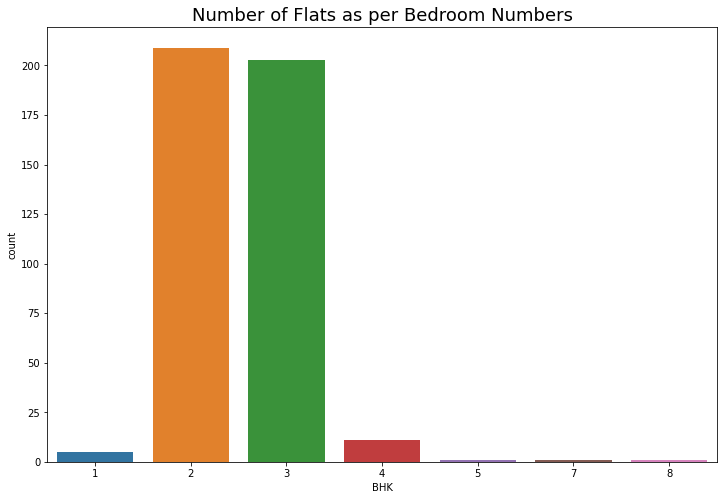

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(data.BHK)
plt.title('Number of Flats as per Bedroom Numbers',size = 18)


In [10]:
data.Area_type.value_counts()

carpet area    379
super area      52
Name: Area_type, dtype: int64

In [86]:
data.Direction.value_counts()

East              196
West              109
North              49
North - East       40
No Information     15
South              13
North - West        4
South - East        4
South -West         1
Name: Direction, dtype: int64

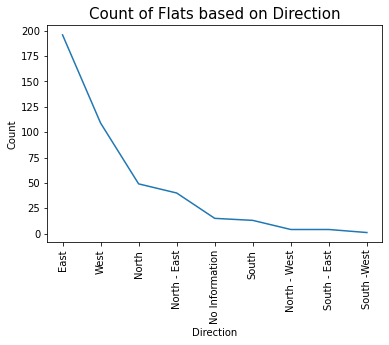

In [144]:
plt.plot(data.Direction.value_counts())
plt.xticks(rotation = 90)
plt.title("Count of Flats based on Direction",fontsize = 15)
plt.ylabel('Count')
plt.xlabel('Direction')
plt.show()

**Observation : East is the most popular direction to make the House as it is also suggested best in The Vastushastra**

In [91]:
data.Floor.value_counts()

3                 73
4                 71
1                 71
2                 70
5                 58
0                 22
8                 11
9                  8
11                 8
6                  7
No Information     6
10                 5
7                  5
13                 4
16                 2
17                 1
27                 1
25                 1
14                 1
12                 1
18                 1
15                 1
22                 1
28                 1
24                 1
Name: Floor, dtype: int64

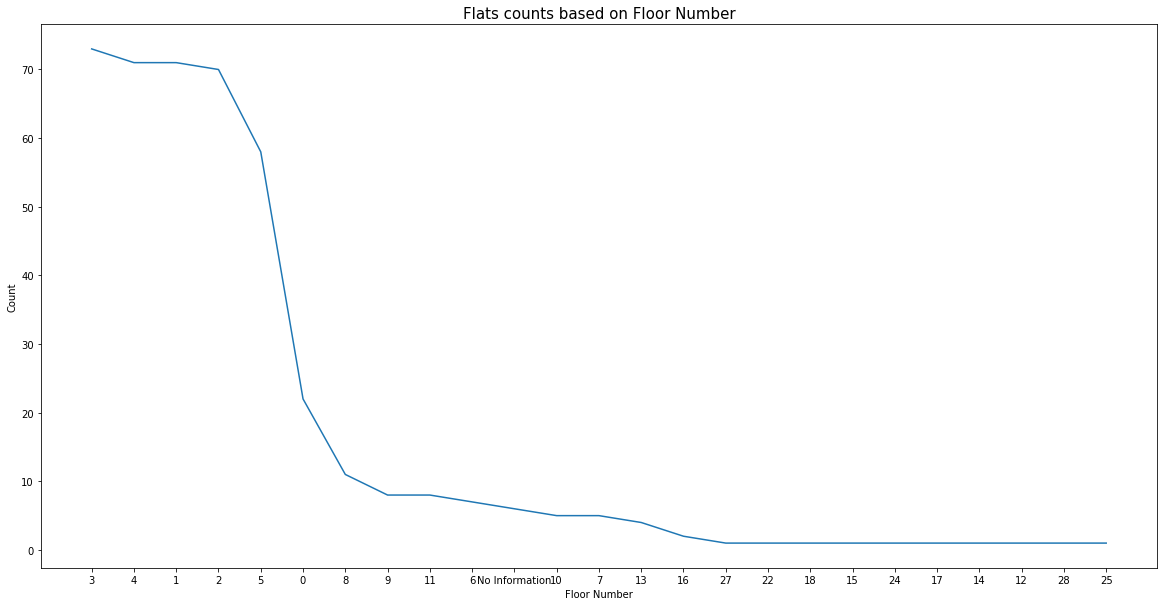

In [146]:
plt.figure(figsize = (20,10))
plt.plot(data.Floor.value_counts())
plt.title("Flats counts based on Floor Number", fontsize = 15)
plt.xlabel("Floor Number")
plt.ylabel("Count")
plt.show()

In [95]:
data.Possesion.value_counts()

Ready to Move             426
Not decided                 2
 Possession by Dec '21      2
 Possession by Nov '22      1
Name: Possesion, dtype: int64

In [96]:
data.Possesion.value_counts(normalize=True)

Ready to Move             0.988399
Not decided               0.004640
 Possession by Dec '21    0.004640
 Possession by Nov '22    0.002320
Name: Possesion, dtype: float64

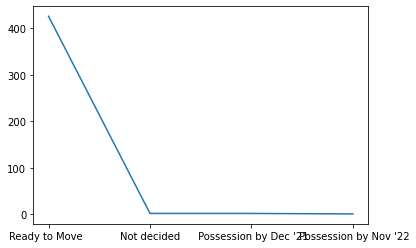

In [12]:
plt.plot(data.Possesion.value_counts())

**Observation : 98.8% flats flats are Ready to Move**

In [99]:
data.Main_Area.value_counts()

Gachibowli             24
Kondapur               17
Kompally               13
Nizampet               13
Bachupally             12
                       ..
Hyder Nagar,            1
Habsiguda, NH           1
Jaya Puri               1
Krishna Nagar,          1
Jayaprakash Narayan     1
Name: Main_Area, Length: 169, dtype: int64

In [100]:
data.Main_Area.value_counts(normalize=True)

Gachibowli             0.055684
Kondapur               0.039443
Kompally               0.030162
Nizampet               0.030162
Bachupally             0.027842
                         ...   
Hyder Nagar,           0.002320
Habsiguda, NH          0.002320
Jaya Puri              0.002320
Krishna Nagar,         0.002320
Jayaprakash Narayan    0.002320
Name: Main_Area, Length: 169, dtype: float64

*** GacchiBowli, Kondapur , kompally are the areas with highest flats available to sale:**
    
    If we notice these are located near the edges of the city,
    Also Gacchibowli and Kondapur are near the Main IT sector Hub
    kompally is the nearest place to Secunderabad where the development is happening

<AxesSubplot:xlabel='Price'>

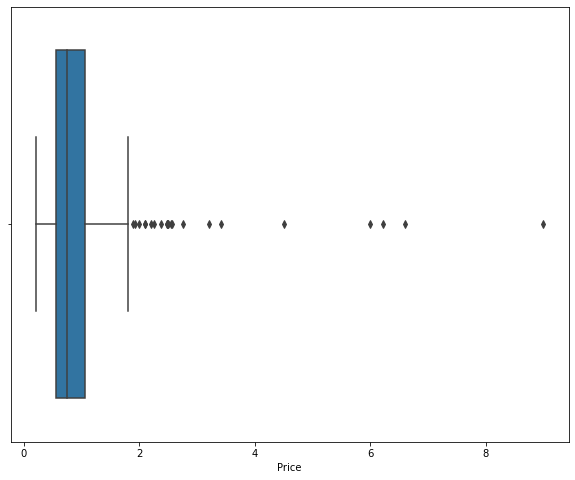

In [107]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data['Price'])

**Note**- We are not removing Outliers as the prices are High because of the locality and we are studing the data of the whole Hyderabad city

In [124]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)


In [125]:
(Q1)

Price           0.55
BHK             2.00
Area_sqft    1018.50
Name: 0.25, dtype: float64

In [122]:
Q3

Price           1.055
BHK             3.000
Area_sqft    1522.500
Name: 0.75, dtype: float64

**Most flats prices are ranged between 55 lacs to 1.05 crore**

In [118]:
IQR = Q3-Q1

In [120]:
print(IQR)

Price          0.505
BHK            1.000
Area_sqft    504.000
dtype: float64


Text(0.5, 1.0, 'Price as per Bedroom')

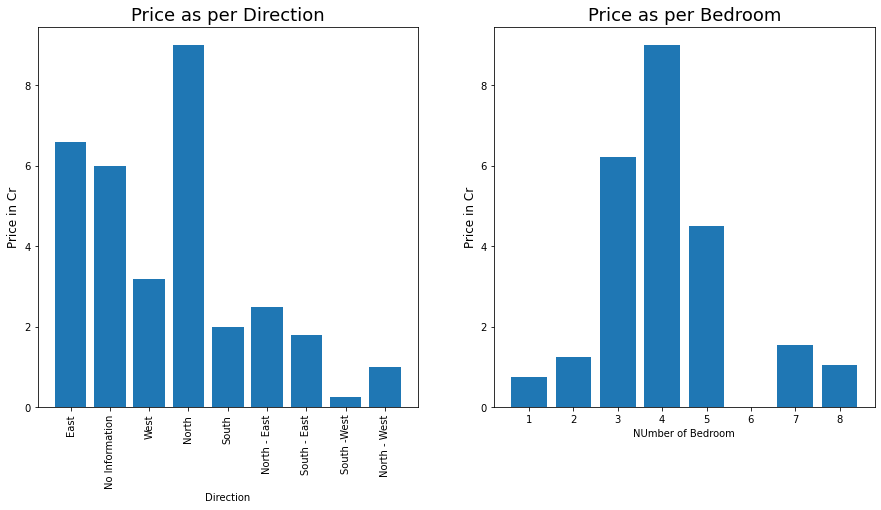

In [51]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.bar(data.Direction,data.Price)
plt.xticks(rotation=90)
plt.xlabel('Direction')
plt.ylabel('Price in Cr', fontsize = 12)
plt.title('Price as per Direction',fontsize = 18)
plt.subplot(122)
plt.bar(data.BHK,data.Price)
plt.xlabel('NUmber of Bedroom')
plt.ylabel('Price in Cr', fontsize = 12)
plt.title('Price as per Bedroom',fontsize = 18)

**Observation** : we can not clearly say the most desired direction by makers as Most of the Flats do not have information about the direction.
as Per available data North and East are the most availble direction

In [52]:
data

,Society,Price,BHK,Area_type,Area_sqft,Direction,Floor,Possesion,Main_Area,Full_Address,Total_Floor
1,Dukes Galaxy,2.48,3,carpet area,2020,East,2,Ready to Move,"Banjara Hills,","BanjaraHills,NH9",4
2,Sri Hemadurga Sivahills,1.14,3,super area,1900,No Information,No Information,Possession by Dec '21,Puppalaguda,Puppalaguda,No Information
3,SMR Vinay Iconia,1.21,2,super area,1495,No Information,No Information,Not decided,Kondapur,Kondapur,No Information
4,Honer Vivantis,1.30,3,super area,1845,West,11,Ready to Move,Gopanapalli,Gopanapalli,12
5,PBEL City,0.42,2,carpet area,780,North,3,Ready to Move,Medipally,Medipally,5
...,...,...,...,...,...,...,...,...,...,...,...
427,SMR Vinay Iconia,0.44,2,carpet area,900,West,5,Ready to Move,"Uppal, NH","Uppal,NH22",5
428,Rajapushpa Regalia,0.90,3,carpet area,1480,East,1,Ready to Move,"DD Colony,","DDColony,Amberpet",5
429,Dukes Galaxy,1.20,2,carpet area,1240,South,9,Ready to Move,Hitech City,HitechCity,11
430,SMR Vinay Iconia,0.45,2,carpet area,980,East,1,Ready to Move,"Miyapur, NH","Miyapur,NH9",3


Text(0.5, 1.0, 'Area Type Count')

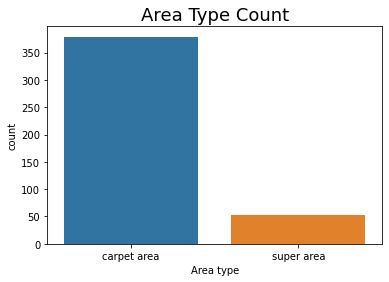

In [18]:
sns.countplot(data.Area_type)
plt.xlabel('Area type')
plt.title('Area Type Count',fontsize = 18)

In [9]:
data.Area_type.value_counts()

carpet area    379
super area      52
Name: Area_type, dtype: int64

**Observation**: The 88% flats have described area in carpet area. Which is the ultimate space that is usable in a flat.
    Carpet area = Area of bedroom + living room + balconies + toilets – the thickness of the inner walls
    
Super Area contains : Super Area includes all the area which a saler is providing including the common area also.
         Super built-up area = Built-up area + proportionate common area
            
**So while purchasing a flat take carpet area in consideration**

In [17]:
(data.Area_sqft.sum())

586036

### Observation 
**The 431 flats have the toal area of 5 lac 86 thousand square feet . The website had nearly 950 flats listed so we can infer that the hyderabad city has residential flats of atleast 10 lac square feet area.**

In [24]:
data

,Society,Price,BHK,Area_type,Area_sqft,Direction,Floor,Possesion,Main_Area,Full_Address,Total_Floor
1,Dukes Galaxy,2.48,3,carpet area,2020,East,2,Ready to Move,"Banjara Hills,","BanjaraHills,NH9",4
2,Sri Hemadurga Sivahills,1.14,3,super area,1900,No Information,No Information,Possession by Dec '21,Puppalaguda,Puppalaguda,No Information
3,SMR Vinay Iconia,1.21,2,super area,1495,No Information,No Information,Not decided,Kondapur,Kondapur,No Information
4,Honer Vivantis,1.30,3,super area,1845,West,11,Ready to Move,Gopanapalli,Gopanapalli,12
5,PBEL City,0.42,2,carpet area,780,North,3,Ready to Move,Medipally,Medipally,5
...,...,...,...,...,...,...,...,...,...,...,...
427,SMR Vinay Iconia,0.44,2,carpet area,900,West,5,Ready to Move,"Uppal, NH","Uppal,NH22",5
428,Rajapushpa Regalia,0.90,3,carpet area,1480,East,1,Ready to Move,"DD Colony,","DDColony,Amberpet",5
429,Dukes Galaxy,1.20,2,carpet area,1240,South,9,Ready to Move,Hitech City,HitechCity,11
430,SMR Vinay Iconia,0.45,2,carpet area,980,East,1,Ready to Move,"Miyapur, NH","Miyapur,NH9",3


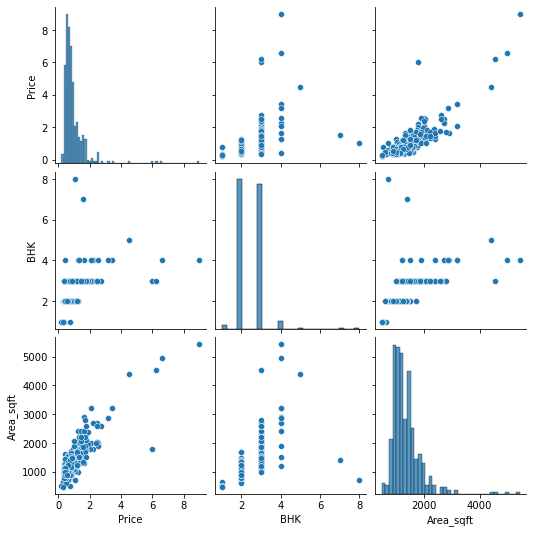

In [33]:
sns.pairplot(data)
plt.show()

<AxesSubplot:xlabel='BHK', ylabel='Area_sqft'>

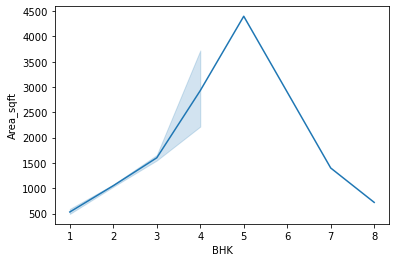

In [16]:
sns.lineplot(data = data, x=data.BHK, y=data.Area_sqft)

In [34]:
data.corr()

,Price,BHK,Area_sqft
Price,1.000000,0.474320,0.846759
BHK,0.474320,1.000000,0.590461
Area_sqft,0.846759,0.590461,1.000000


<AxesSubplot:>

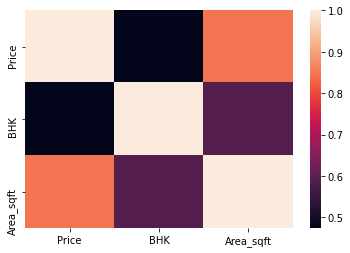

In [36]:
sns.heatmap(data.corr())

**Observation:**
Price is mostly correlated to only Area. So the price has less dependency on  number of bedrooms on comparing with Area. 

In [19]:
B = data.groupby([data.BHK]).mean().reset_index()
print(B)

   BHK     Price    Area_sqft
0    1  0.376000   530.400000
1    2  0.622392  1049.995215
2    3  1.161232  1601.891626
3    4  3.073636  2930.090909
4    5  4.500000  4400.000000
5    7  1.550000  1400.000000
6    8  1.050000   720.000000


In [51]:
data.Area_sqft.mean()

1359.7122969837587

1    0.376000
2    0.622392
3    1.161232
4    3.073636
5    4.500000
6    1.550000
7    1.050000
Name: Price, dtype: float64

In [23]:
c = data.groupby(data.Main_Area)['Price'].mean().reset_index().sort_values('Price',ascending=False).head(10)
c

,Main_Area,Price
91,"MLA Colony,",4.500000
70,Jubilee Hills,4.250000
150,"Srinagar Colony,",3.995000
1,"Abids, NH",3.420000
148,"Somajiguda, NH",2.750000
60,"Huda Colony-Attapur,",2.250000
145,Shaikpet,2.225000
84,"Krishna Nagar,",2.100000
92,Madhapur,1.960000
19,"Banjara Hills,",1.931111


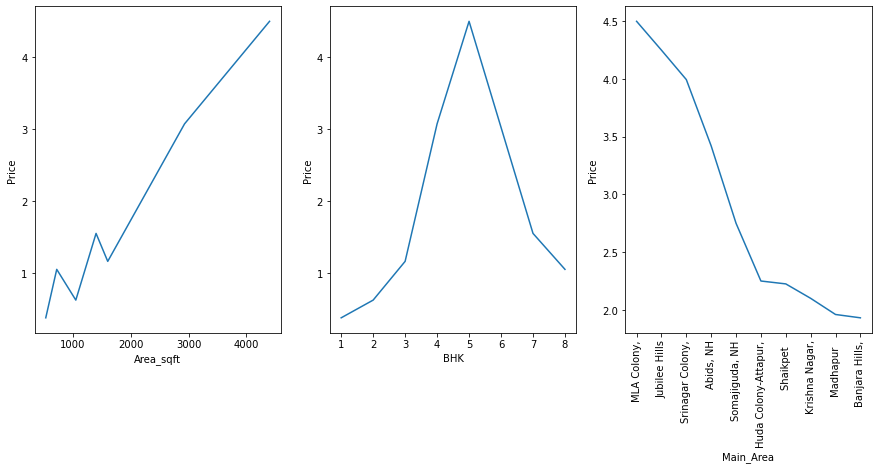

In [134]:
plt.figure(figsize=(15,6))
plt.subplot(131)
sns.lineplot(data=B,x=B.Area_sqft,y=B.Price)
plt.subplot(132)
sns.lineplot(data=B,x=B.BHK,y=B.Price)
plt.subplot(133)
sns.lineplot(data=c,x='Main_Area',y='Price')
plt.xticks(rotation=90)
plt.show()

### Conclusion

1. The co-relation between Area and Price is .8467. We can infere that if customer increases the size of flat to purchase then the price would have chances to  increase by 84%
2. Average Price - As per the Analysis ofdata sample the buyer could estimate his budget as per below average prices 
    Overall  -  95 Lakh(Including all the outliers, There are flats of 9crore also reason being the location, jubilee hills.)
    1 BHK    - 37.5 Lac
    2 BHK    - 62 Lac
    3 BHK    - 1.16 cr
    4 BHK    - 3 cr
    5 BHK    - 4.5 cr
3. Average Size of the flat
     Overall  - 1360 sqft
     1 BHK    - 530 sqft
    2 BHK     - 1049 sqft
    3 BHK     - 1601 sqft
    4 BHK     - 2930 sqft
    5 BHK     - 4400 sqft
    
4. By the graph we can understand that the prices are maximum at MLA Colony, Jubilee Hills, Srinagar Colony
These can be considered tha posh area of the city